Matias Medrano Ascencio

Lunes 2 de octubre del 2023

# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [49]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [50]:
dt = 0.001

def movimiento(W0, N): 
    W = [W0]      
    X = [1,-1]
    for i in range(N):
        v = random.choice(X)
        W.append(W[-1] + v*np.sqrt(dt))
    return W

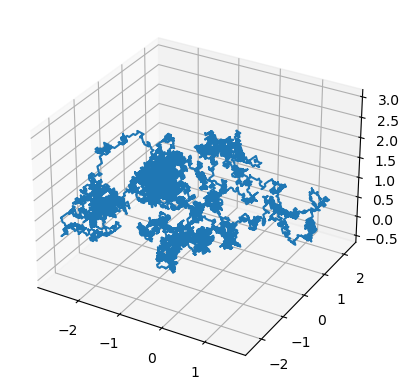

In [51]:
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
x = np.array(movimiento(0, 10000))
y = np.array(movimiento(0, 10000))
z = np.array(movimiento(0, 10000))
plt.plot(x,y,z)

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

**Punto 1**

In [52]:
import numpy as np

def tirar_moneda():
    return np.random.randint(0, 2)

In [53]:
def juego():
    moneda = tirar_moneda()
    if (moneda == 0):
        return False
    else:
        return True

In [54]:
def op_apuesta(C):
    if C[-1] >= 6:
        apuesta = C[-1]/2
    else:
        apuesta = 2
    return apuesta

In [55]:
def jugador(C0):
    C = [C0]
    while C[-1] > 0:
        apuesta = op_apuesta(C)
        gano = juego()
        if gano:
            C.append(C[-1] + apuesta)
        else:
            C.append(C[-1] - apuesta)
    return C

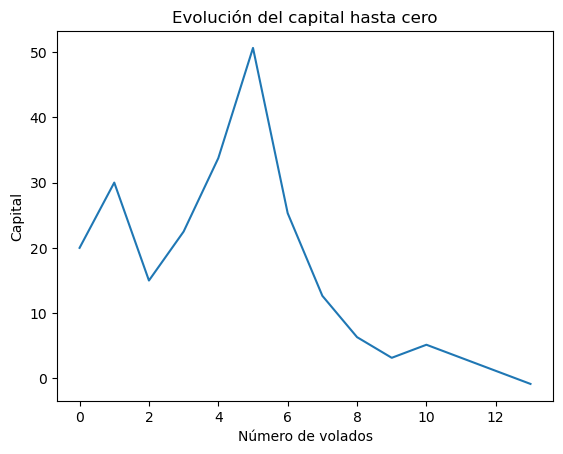

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

C0 = 20
apuesta = jugador(C0)

plt.plot(apuesta)
plt.xlabel("Número de volados")
plt.ylabel("Capital")
plt.title("Evolución del capital hasta cero")
plt.show()

**Punto 2**

In [68]:
def simulacion_montecarlo(num, C0):
    resultados_finales = []
    num_volados_totales = []
    
    for i in range(num):
        resultado = jugador(C0)
        resultados_finales.append(resultado)
        num_volados = len(resultado) - 1
        num_volados_totales.append(num_volados)

    return num_volados_totales

num_volados_totales = simulacion_montecarlo(10000, 20)
num_volados_promedio = np.mean(num_volados_totales)
print("El número de volados promedio para quedar en quiebra es de:", round(num_volados_promedio))

El número de volados promedio para quedar en quiebra es de: 26


**Punto 3**

(array([6.544e+03, 2.274e+03, 7.480e+02, 2.610e+02, 1.090e+02, 3.800e+01,
        1.500e+01, 4.000e+00, 6.000e+00, 1.000e+00]),
 array([  5. ,  27.2,  49.4,  71.6,  93.8, 116. , 138.2, 160.4, 182.6,
        204.8, 227. ]),
 <BarContainer object of 10 artists>)

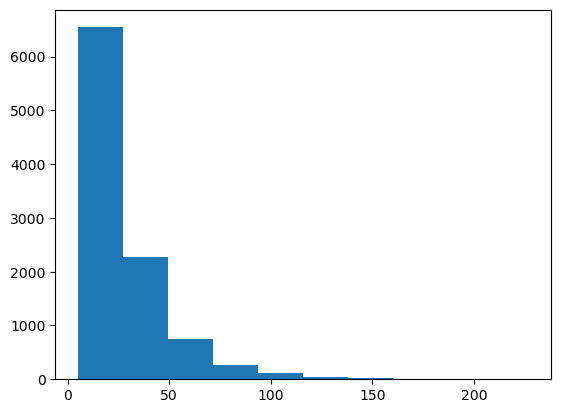

In [69]:
plt.hist(num_volados_totales)